# Store Sales - Time Series Forecasting

## Performing store sales analysis and using ML to predict grocery sales

### Importing Libraries

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model

### Loading And Examining Datasets

I will upload all datasets and examine it carefully, will also check the dimensions.

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
train.shape

(3000888, 6)

In [4]:
test = pd.read_csv('test.csv')

In [5]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [7]:
test.shape

(28512, 5)

In [8]:
transactions = pd.read_csv('transactions.csv')

In [9]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
transactions.shape

(83488, 3)

In [12]:
stores = pd.read_csv('stores.csv')

In [13]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [15]:
stores.shape

(54, 5)

In [16]:
oil = pd.read_csv('oil.csv')

In [17]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [18]:
oil.shape

(1218, 2)

In [19]:
holidays_events = pd.read_csv('holidays_events.csv')

In [20]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [21]:
holidays_events.shape

(350, 6)

#### After carefully examining the datasets, I could see room for improvements, let's execute it!

### Uploading Editted And Final Datasets

In [133]:
train = pd.read_csv("train.csv", parse_dates =['date'] )
test = pd.read_csv("test.csv", parse_dates =['date'])
holidays_events = pd.read_csv("holidays_events.csv", parse_dates =['date'])
oil = pd.read_csv("oil.csv", parse_dates =['date'])
transactions = pd.read_csv("transactions.csv", parse_dates =['date'])
stores = pd.read_csv("stores.csv")

In [134]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [135]:
train.tail()

,id,date,store_nbr,family,sales,onpromotion
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


In [136]:
train.shape

(3000888, 6)

In [137]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [138]:
test.shape

(28512, 5)

With the parse command, now we could see the dates in the proper format

When I was examining the oil dataset before editing it, I saw that the column name is written incorrect, let's fix it

In [139]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [140]:
oil.rename(columns={'dcoilwtico':'oilprice'}, inplace=True)

In [141]:
oil.head()

,date,oilprice
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


#### A lot of files, let's merge it

### Merging datasets

In [142]:
train = train.merge(oil, on = 'date', how = 'left')
train = train.merge(stores, on = 'store_nbr', how = 'left')
train = train.merge(transactions, on = ['date', 'store_nbr'], how = 'left')


test = test.merge(oil, on = 'date', how = 'left')
test = test.merge(stores, on = 'store_nbr', how = 'left')
test = test.merge(transactions, on = ['date', 'store_nbr'], how = 'left')

train.head()

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN


In [143]:
test.head()

,id,date,store_nbr,family,onpromotion,oilprice,city,state,type,cluster,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,0,46.8,Quito,Pichincha,D,13,NaN
1,3000889,2017-08-16,1,BABY CARE,0,46.8,Quito,Pichincha,D,13,NaN
2,3000890,2017-08-16,1,BEAUTY,2,46.8,Quito,Pichincha,D,13,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,46.8,Quito,Pichincha,D,13,NaN
4,3000892,2017-08-16,1,BOOKS,0,46.8,Quito,Pichincha,D,13,NaN


In [144]:
print("train shape :", train.shape)
print("test shape :", test.shape)

train shape : (3000888, 12)
test shape : (28512, 11)


Let's find the missing values in the dataset

In [149]:
train.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
oilprice        928422
city                 0
state                0
type                 0
cluster              0
transactions    245784
dtype: int64

Looks good, let's go ahead.

In [155]:
train["family"].value_counts()            # These are all types of products available 

MAGAZINES                     90936
AUTOMOTIVE                    90936
BEAUTY                        90936
LINGERIE                      90936
GROCERY II                    90936
CELEBRATION                   90936
BABY CARE                     90936
SCHOOL AND OFFICE SUPPLIES    90936
LAWN AND GARDEN               90936
FROZEN FOODS                  90936
BOOKS                         90936
LADIESWEAR                    90936
SEAFOOD                       90936
HOME APPLIANCES               90936
PLAYERS AND ELECTRONICS       90936
MEATS                         90936
EGGS                          90936
POULTRY                       90936
LIQUOR,WINE,BEER              90936
PREPARED FOODS                90936
HOME CARE                     90936
BREAD/BAKERY                  90936
CLEANING                      90936
GROCERY I                     90936
DELI                          90936
DAIRY                         90936
PET SUPPLIES                  90936
PERSONAL CARE               

In [157]:
train["city"].value_counts()          # Top cities

Quito            1000296
Guayaquil         444576
Santo Domingo     166716
Cuenca            166716
Machala           111144
Ambato            111144
Manta             111144
Latacunga         111144
Guaranda           55572
Ibarra             55572
Puyo               55572
Babahoyo           55572
Salinas            55572
Playas             55572
Esmeraldas         55572
Libertad           55572
Loja               55572
El Carmen          55572
Cayambe            55572
Quevedo            55572
Riobamba           55572
Daule              55572
Name: city, dtype: int64

In [159]:
train["type"].value_counts()     # Type of store

D    1000296
C     833580
A     500148
B     444576
E     222288
Name: type, dtype: int64

## Feature Engineering

Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data

In [171]:
train['dayofweek'] = train['date'].dt.dayofweek
train['quarter'] = train['date'].dt.quarter
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['dayofyear'] = train['date'].dt.dayofyear

In [174]:
train.shape

(3000888, 17)

In [173]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,cluster,transactions,dayofweek,quarter,month,year,dayofyear
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,1,1,1,2013,1
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,1,1,1,2013,1
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,1,1,1,2013,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,1,1,1,2013,1
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,1,1,1,2013,1


## Visualizations/Data Analysis/EDA

I am going to plot a heatmap now. By displaying a panda dataframe in Heatmap style, the user gets a visualisation of the numeric data. It gives an overview of the complete dataframe which makes it very much easy to understand the key points in the dataframe.

<AxesSubplot:>

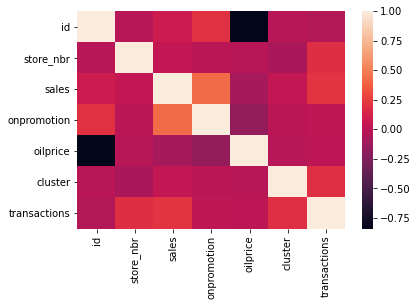

In [162]:
corr = train.corr()  # corr() is used to find the pairwise correlation of all columns in the dataframe
sns.heatmap(corr)

<AxesSubplot:xlabel='store_nbr', ylabel='sales'>

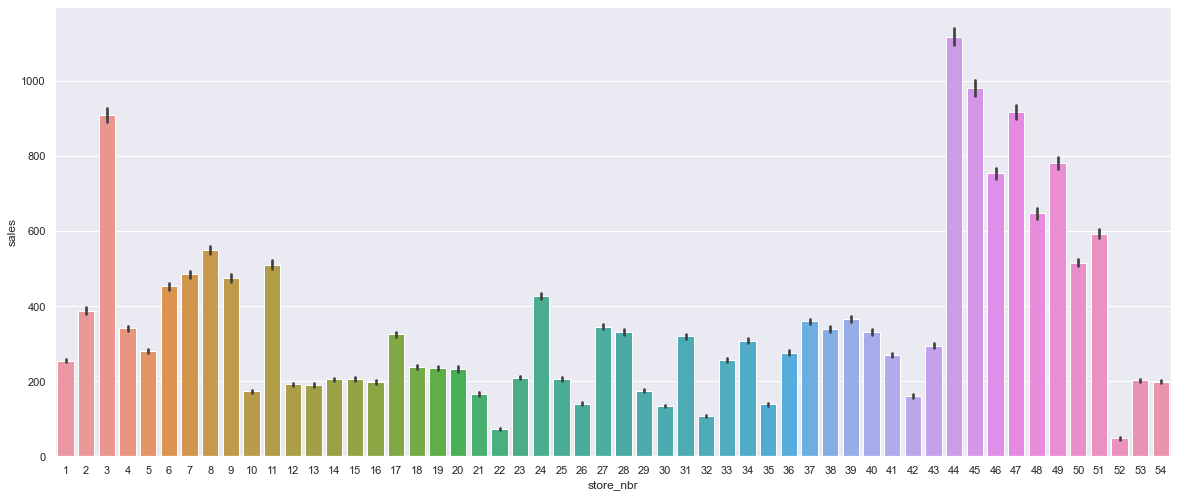

In [165]:
sns.barplot(x = 'store_nbr',y = 'sales',data = train)

<AxesSubplot:xlabel='year', ylabel='sales'>

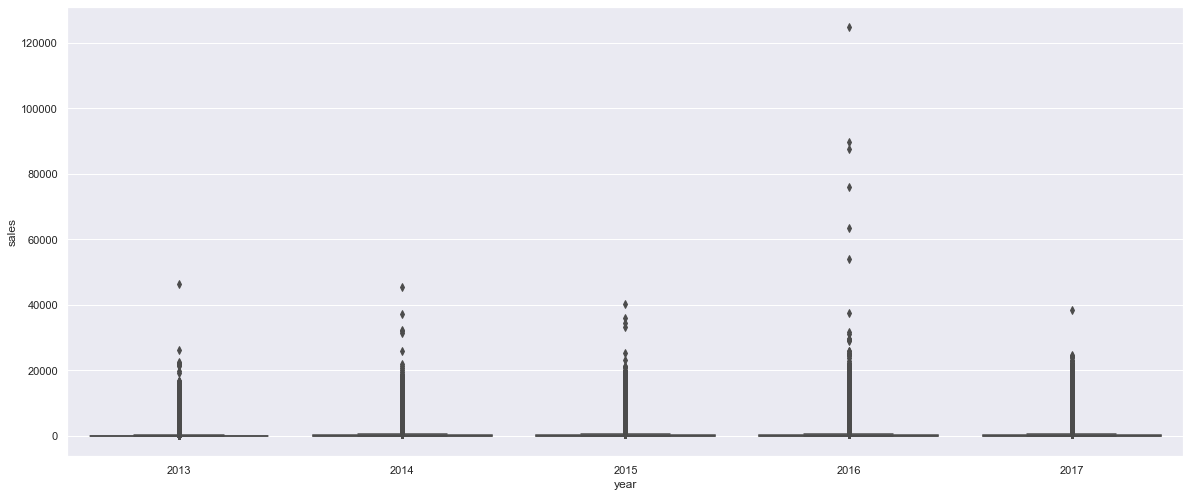

In [175]:
sns.boxplot( x='year', y='sales',data=train)

Why is it different in 2016?  Because of an Earthquake.

That's certainly some outliars

In [186]:
find_outlier = train['sales'] >= 60000                     
train.loc[find_outlier]                            # Finding Index of the outlier to drop it

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,cluster,transactions,dayofweek,quarter,month,year,dayofyear
2139699,2139699,2016-04-18,45,GROCERY I,76090.000,38,39.74,Quito,Pichincha,A,11,3895.0,0,2,4,2016,109
2144154,2144154,2016-04-21,20,GROCERY I,87438.516,53,43.18,Quito,Pichincha,B,6,1692.0,3,2,4,2016,112
2153031,2153031,2016-04-26,2,GROCERY I,63434.000,30,42.52,Quito,Pichincha,D,13,1778.0,1,2,4,2016,117
2163723,2163723,2016-05-02,2,GROCERY I,124717.000,59,44.75,Quito,Pichincha,D,13,1905.0,0,2,5,2016,123
2445984,2445984,2016-10-07,39,MEATS,89576.360,0,49.76,Cuenca,Azuay,B,6,1295.0,4,4,10,2016,281


In [188]:
train.shape

(3000888, 17)

In [189]:
train.drop([0,2139699], inplace = True) 

In [190]:
train.shape

(3000886, 17)

In [192]:
train.drop([2144154], inplace = True) 
train.drop([2153031], inplace = True) 
train.drop([2163723], inplace = True) 
train.drop([2445984], inplace = True) 

In [193]:
train.shape

(3000882, 17)

<AxesSubplot:xlabel='year', ylabel='sales'>

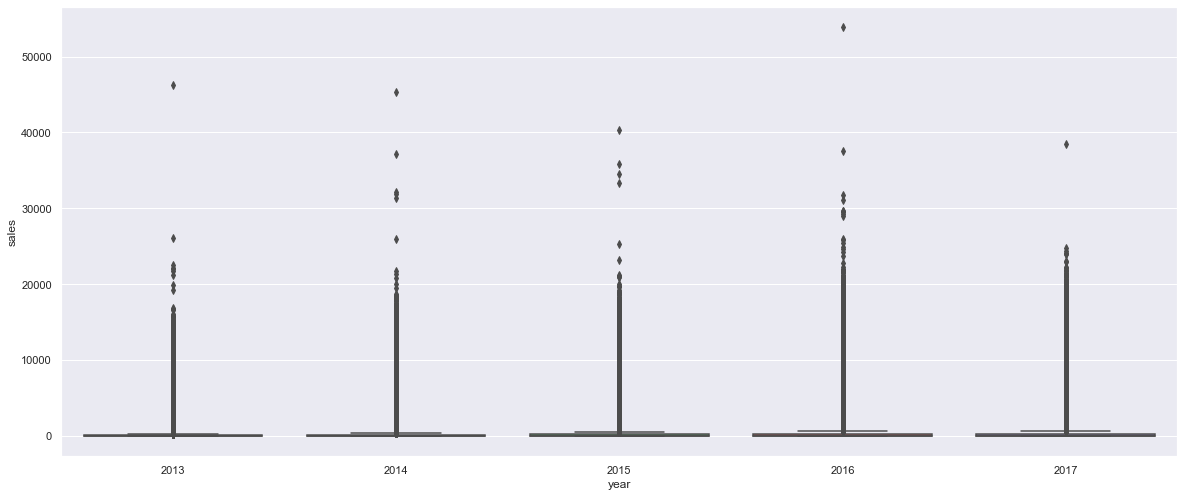

In [194]:
sns.boxplot( x='year', y='sales',data=train)

Looks good after removing outliars

<AxesSubplot:xlabel='year', ylabel='oilprice'>

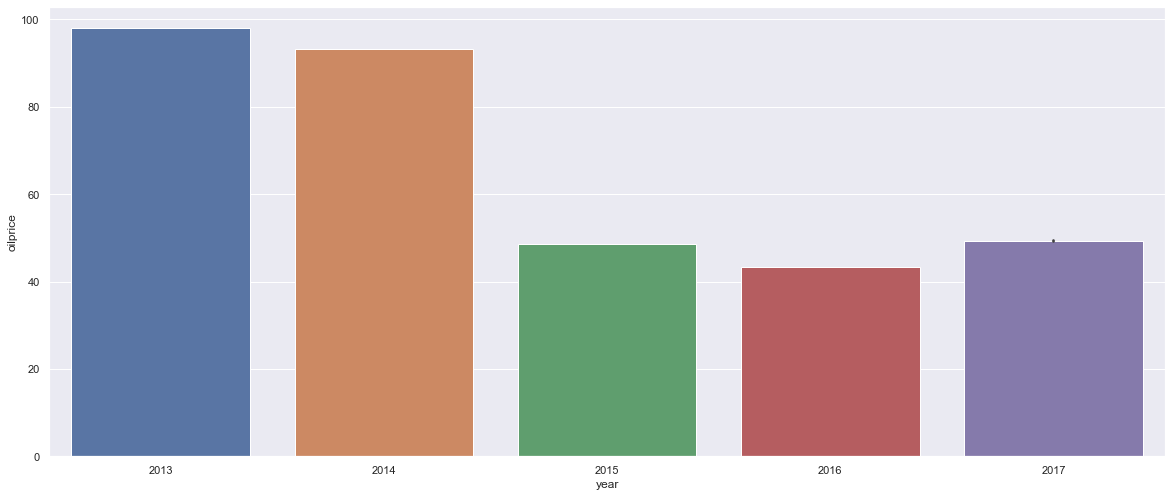

In [195]:
sns.barplot( x='year', y='oilprice',data=train)

2013- Highest oil price,   2016 - Lowest oil price

<AxesSubplot:xlabel='state', ylabel='sales'>

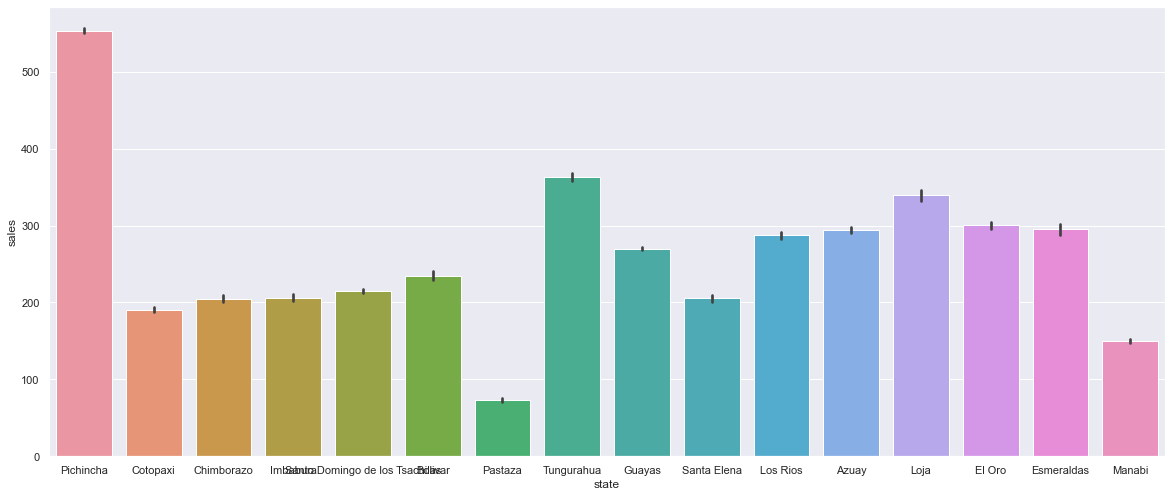

In [196]:
sns.barplot( x='state', y='sales',data=train)

Pichincha has the maximum number of sales 

<AxesSubplot:xlabel='store_nbr', ylabel='transactions'>

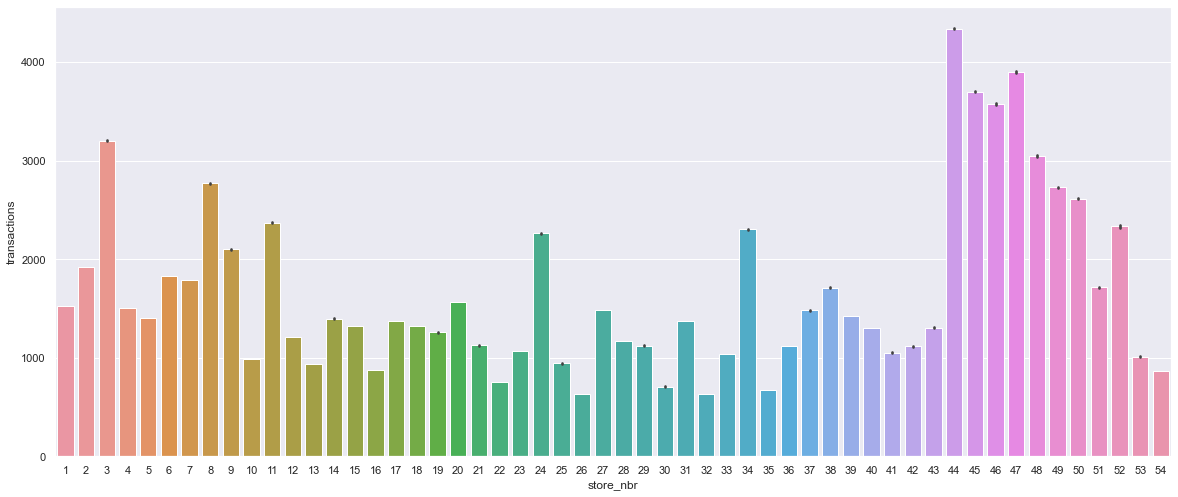

In [197]:
sns.barplot( x='store_nbr', y='transactions',data=train)

44th Store has maximum Transactions

In [203]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,oilprice,city,state,type,cluster,transactions,dayofweek,quarter,month,year,dayofyear
1,1,2013-01-01,1,BABY CARE,0.0,0,NaN,Quito,Pichincha,D,13,NaN,1,1,1,2013,1
2,2,2013-01-01,1,BEAUTY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,1,1,1,2013,1
3,3,2013-01-01,1,BEVERAGES,0.0,0,NaN,Quito,Pichincha,D,13,NaN,1,1,1,2013,1
4,4,2013-01-01,1,BOOKS,0.0,0,NaN,Quito,Pichincha,D,13,NaN,1,1,1,2013,1
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,NaN,Quito,Pichincha,D,13,NaN,1,1,1,2013,1


In [205]:
sns.plot( x='year', y='sales',data=train)

AttributeError: module 'seaborn' has no attribute 'plot'

In [210]:
train.index = train.year

In [211]:
train_d = seasonal_decompose(train, model = 'multiplicative')
train_d.plot()
plt.show()

TypeError: float() argument must be a string or a number, not 'Timestamp'